In [2]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import nninit
import uuid



In [3]:
img_size = 256
scale = .1

In [4]:
z = torch.rand(8)

In [5]:

class net(nn.Module):
    def __init__(self):
        super(net, self).__init__()
        self.ln1 = nn.Linear(11,32,bias=False)
        self.ln2 = nn.Linear(32,32,bias=False)
        self.ln3 = nn.Linear(32,32,bias=False)
        self.ln4 = nn.Linear(32,1,bias=False)
        nninit.uniform(self.ln1.weight, a=-1,b=1)
        nninit.uniform(self.ln2.weight,a=-1,b=1)
        nninit.uniform(self.ln3.weight,a=-1,b=1)
        nninit.uniform(self.ln4.weight,a=-1,b=1)
        self.tanh1 = nn.Tanh()
        self.tanh2 = nn.Tanh()
        self.tanh3 = nn.Tanh()
        self.sigmoid = nn.Sigmoid()
    def forward(self,x):
        U = self.ln1(x)
        U = self.tanh1(U)
        U = self.ln2(U)
        U = self.tanh2(U)
        U = self.ln3(U)
        U = self.tanh3(U)
        U = torch.sin(self.ln4(U))
        return self.sigmoid(U)
G = net()


In [6]:
def createInputVec(z,x,y):
    r = math.sqrt(((x*scale-(img_size*scale/2))**2) + ((y*scale-(img_size*scale/2))**2) )
    z_size = len(z)
    input = torch.rand(1,z_size + 3)
    
    for i in range(z_size):
        input[0][i] = z[i] * scale
        
    input[0][z_size] = x * scale
    input[0][z_size+1] = y * scale
    input[0][z_size+2] = r
    input = Variable(input)
    return input

In [7]:
image = np.zeros((img_size ** 2, 1))
for i in range(img_size):
    if (i % 100 == 0):
        print("Percent Done: " + str((i/img_size) * 100) + "%.")
    for j in range(img_size):
        input = createInputVec(z,i,j)
        image[i*img_size + j] = G(input).data.numpy()




Percent Done: 0.0%.


KeyboardInterrupt: 

In [167]:
print(image.shape)
image = image.reshape(img_size,img_size)
print(image.shape)

(65536, 1)
(256, 256)


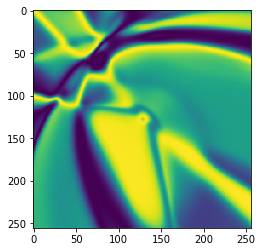

In [9]:
import scipy.misc
unique_filename = str(uuid.uuid4())
scipy.misc.imsave('generated/' + unique_filename + '.jpg', image)
i = i+1
imgplot = plt.imshow(image)
plt.show()

In [10]:
#batch produce
for i in range(100):
    print(i)
    z[0] = z[0] + 1
    z[1] = z[1] + 1
    z[2] = z[2] + 1
    z[3] = z[3] + 1
    z[4] = z[4] + 1
    z[5] = z[5] + 1
    z[6] = z[6] + 1
     
    image = np.zeros((img_size ** 2, 1))
    for i in range(img_size):
        
        for j in range(img_size):
            input = createInputVec(z,i,j)
            image[i*img_size + j] = G(input).data.numpy()

    image = image.reshape(img_size,img_size)
    
    unique_filename = str(uuid.uuid4())
    scipy.misc.imsave('generated/' + unique_filename + '.jpg', image)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60


KeyboardInterrupt: 